In this notebook, I shall implement linear regression with multiple features. The parameters of the model will be found using Linear Regression on the squared error cost function. I shall make use of vectorization in NumPy for faster computation.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('./kc_house_data.csv')
# print(df)

In [115]:
print(df.shape)
print(df.dtypes)

(21613, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [116]:
#we can see that there are certain parameters in the dataset like id, date, latitude, longitude that probably won't affect our price
#so we can drop these columns
#also, parameters like zipcode won't have a linear (or rather, any polynomial) dependence since some areas are more expensive than others but
#zipcodes are generally randomly distributed
df_relevant = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis='columns')
print(df_relevant.dtypes)


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [117]:
#checking if the data is corrupted
print(df_relevant.isnull().any())

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [118]:
#here we will obtain our input data in separate arrays (x_train with the features and y_train with the target variable)

y_train = np.array(df_relevant['price'])
feature_labels = df_relevant.columns
print(feature_labels)
x_train = np.array(df_relevant)[0:,1:]
print(df_relevant.shape, y_train.shape, x_train.shape)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
(21613, 16) (21613,) (21613, 15)


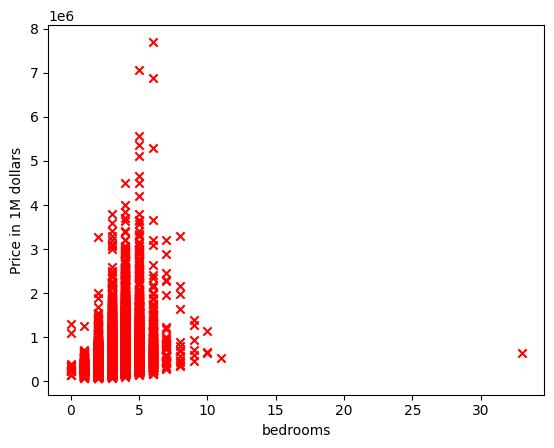

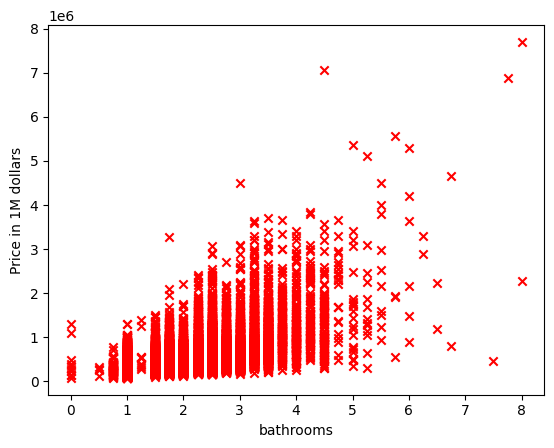

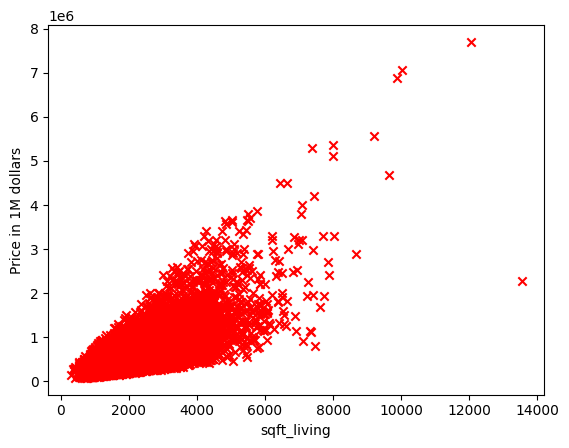

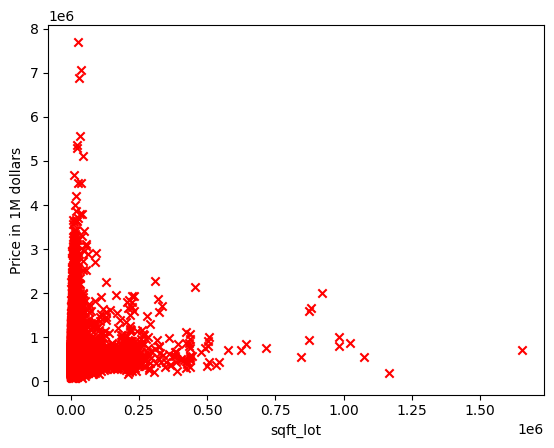

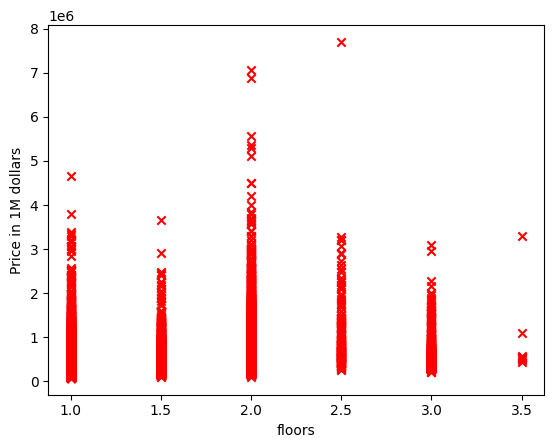

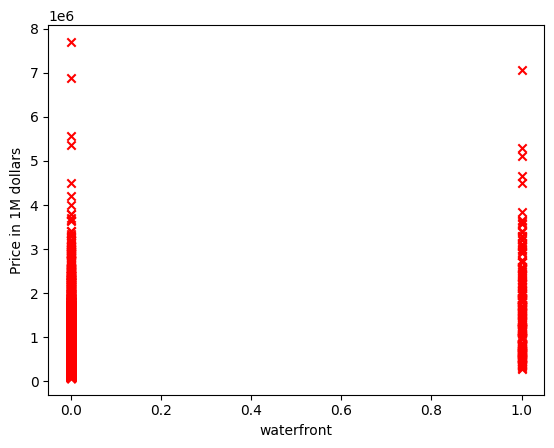

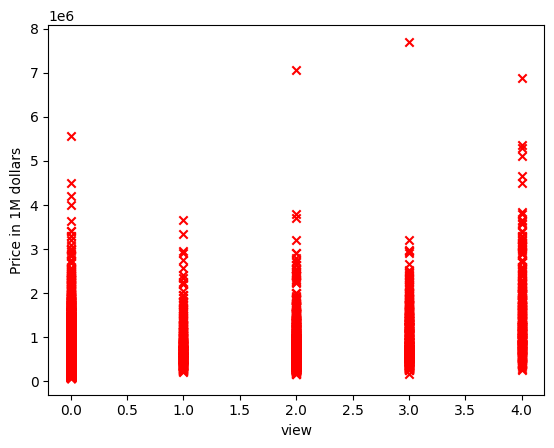

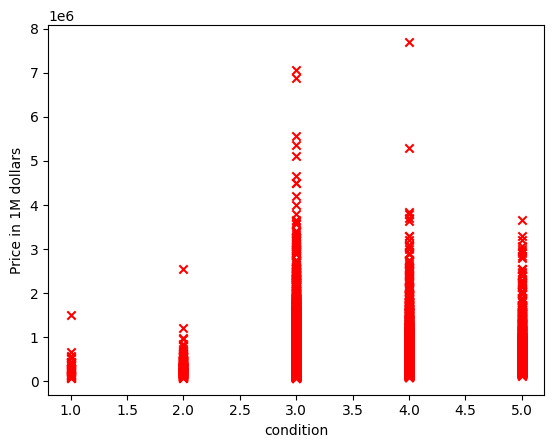

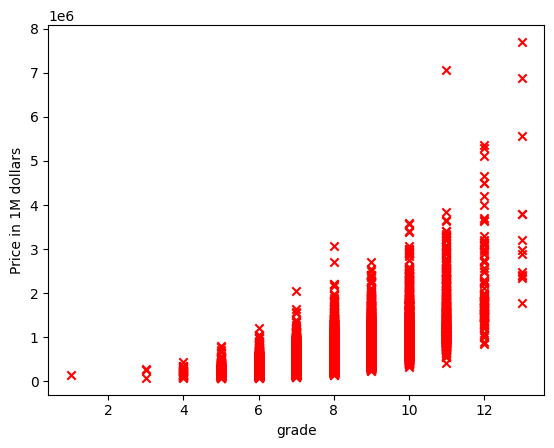

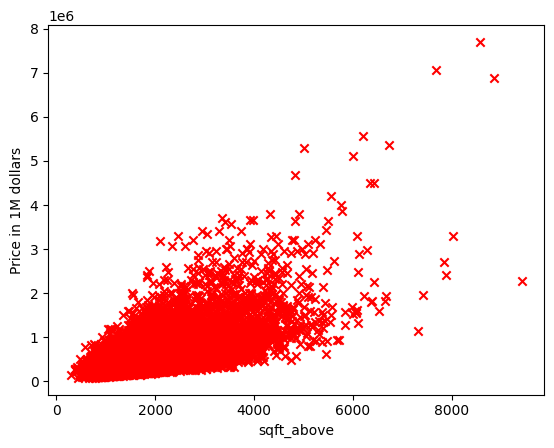

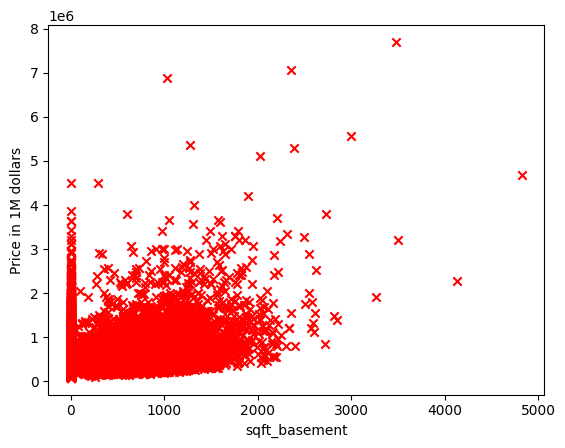

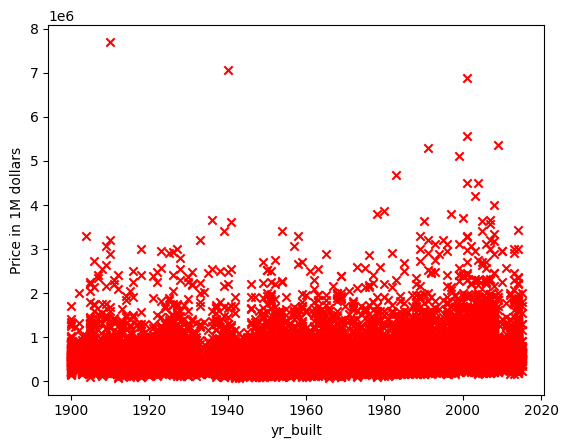

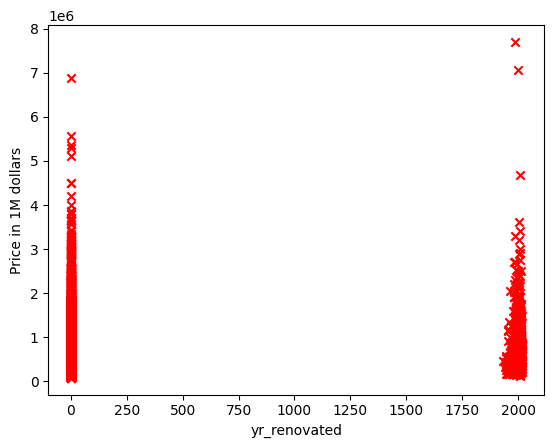

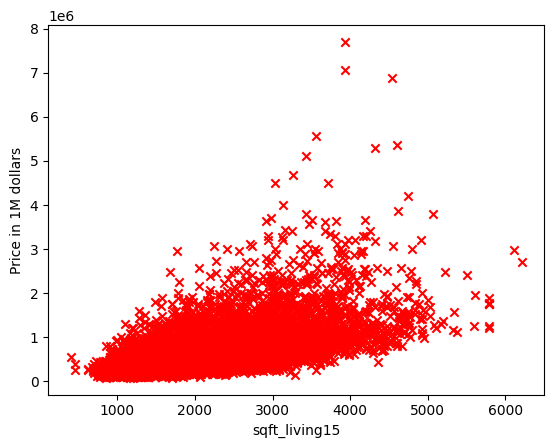

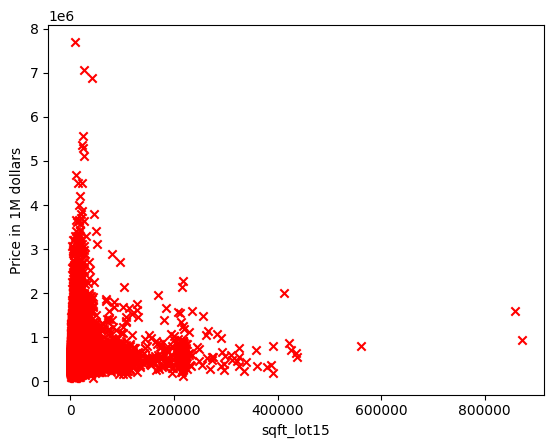

In [119]:
#we shall plot the variation of the target value with a given feature. 
#If the target varies linearly, it makes sense to use linear regression model for that feature

for i in range (x_train.shape[1]): #the number of plots should be equal to the number of features i.e. the number of columns in x_train
    # plt.figure(figsize=(6,6))
    plt.scatter(x_train[:,i], y_train, marker='x', c='r')
    plt.xlabel(feature_labels[i + 1])
    plt.ylabel('Price in 1M dollars')
    plt.show()

In [120]:
#since we don't have any test data, I will split x_train into 20,000 entries that will be used for training the model and 1,613 entries to test it

x_test = x_train[20000:]
y_test = y_train[20000:]
x_train = x_train[:4000]
y_train = y_train[:4000]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#This could distort the model if all the training examples where the jth feature takes a particular value k occur in the last 1,613 entries

(4000, 15) (4000,) (1613, 15) (1613,)


In [122]:
def ComputeCost(x, y, w, b):
    m = x.shape[0]
    J = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        J+= (f_wb - y[i])**2
    J = J / (2 * m)

    return J

In [123]:
def ComputeGradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    n = x_train.shape[1]

    dJ_dw = np.zeros(n)
    dJ_db = 0

    for i in range(m):
        f_wb = np.dot(w,x_train[i]) + b
        for j in range(n):
            dJ_dw[j] = dJ_dw[j] + (f_wb - y_train[i]) * x_train[i][j]
        dJ_db = dJ_db + (f_wb - y_train[i])
    
    dJ_db = dJ_db/m
    dJ_dw = dJ_dw/m

    return dJ_dw, dJ_db

In [124]:
def GradientDescent(x, y, w_in, b_in, NUM_ITER = 10000, LEARN_RATE = 1.0e-3):
    m = x.shape[0]
    n = x.shape[1]

    w = w_in
    b = b_in

    for i in range(NUM_ITER):
        dJ_dw, dJ_db = ComputeGradient(x, y, w, b)
        w = w - LEARN_RATE * dJ_dw
        b = b - LEARN_RATE * dJ_db

        if(i % 100 == 0):
            print(f"iteration number {i} of Grad Descent")
            print("Cost after update is ", ComputeCost(x, y, w, b))
    return w, b

In [132]:
def MultipleLinearRegression(x, y):
    
    #initializing the parameters of linear regression
    w_in = np.zeros(x_train.shape[1])
    b_in = 0

    #parameters of gradient descent
    iterations = 1000
    alpha = 6.5e-10

    w_final, b_final = GradientDescent(x, y, w_in, b_in, iterations, alpha)
    return w_final, b_final

In [133]:
def PredictOutput(test, weight, bias):

    m = test.shape[0]
    prediction = []

    for i in range (m):
        f_wb = np.dot(weight, test[i]) + bias
        prediction.append(f_wb)
    
    return prediction

iteration number 0 of Grad Descent
Cost after update is  200944041543.05023
iteration number 100 of Grad Descent
Cost after update is  69785860141.17879
iteration number 200 of Grad Descent
Cost after update is  48300554237.88543
iteration number 300 of Grad Descent
Cost after update is  43828858553.55218
iteration number 400 of Grad Descent
Cost after update is  42682981478.55461
iteration number 500 of Grad Descent
Cost after update is  42198734618.56349
iteration number 600 of Grad Descent
Cost after update is  41856936425.59372
iteration number 700 of Grad Descent
Cost after update is  41555821913.24039
iteration number 800 of Grad Descent
Cost after update is  41274887576.795906
iteration number 900 of Grad Descent
Cost after update is  41009480412.67345


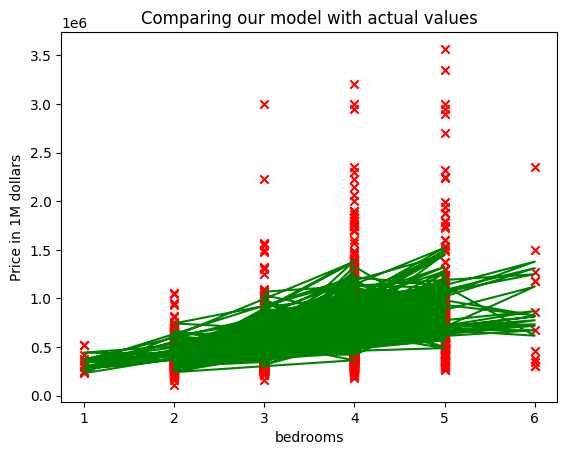

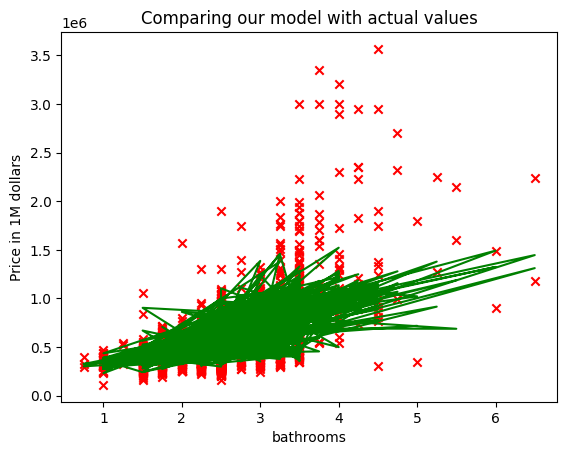

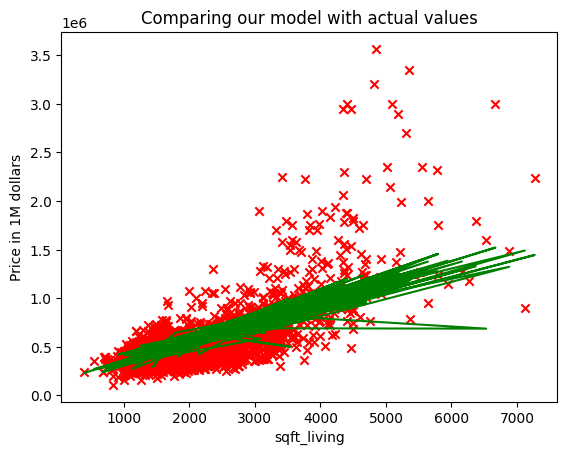

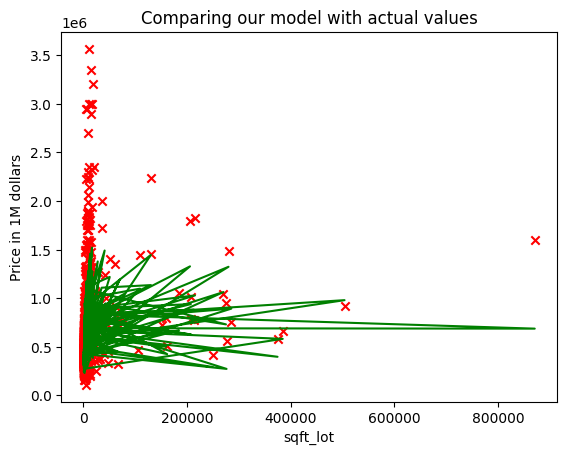

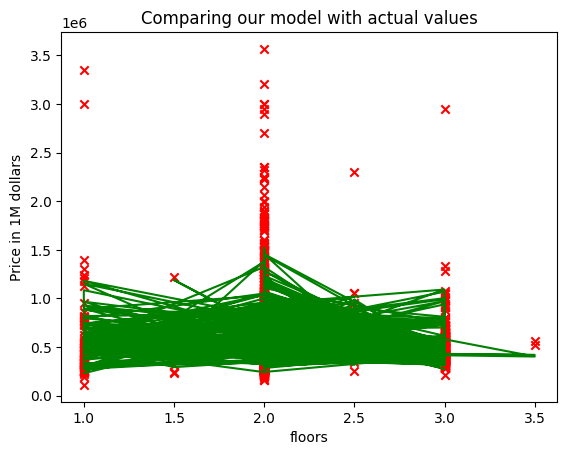

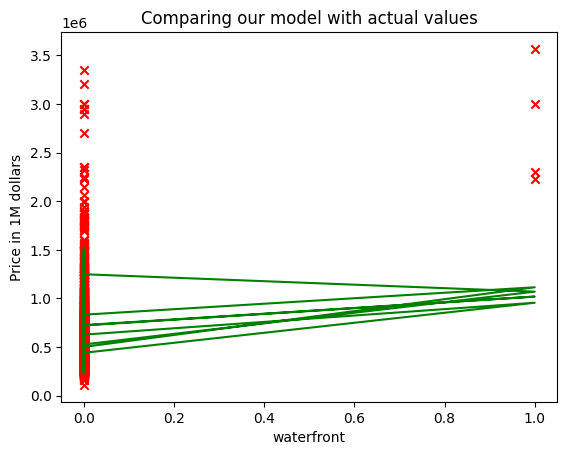

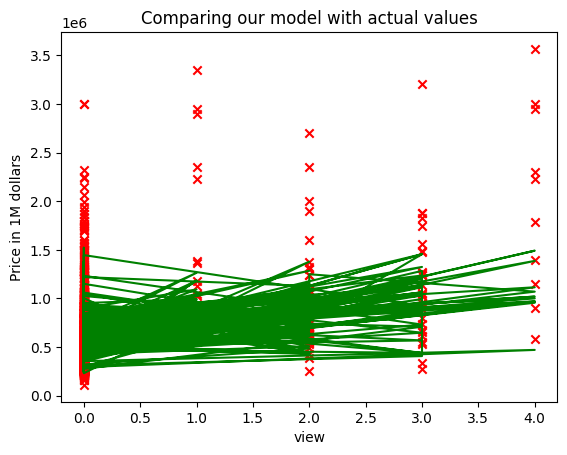

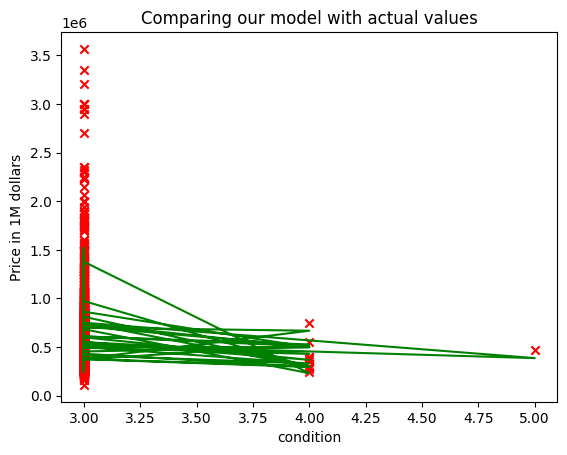

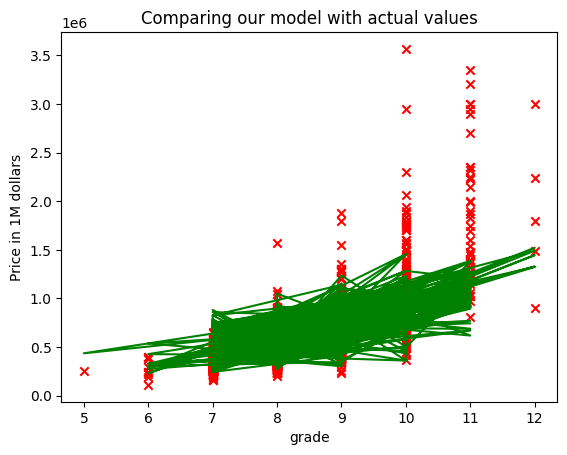

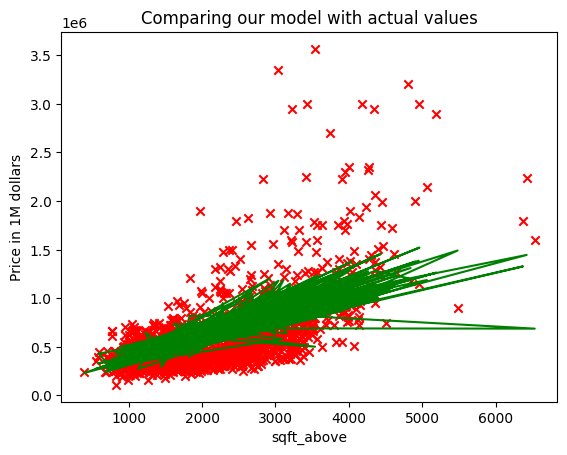

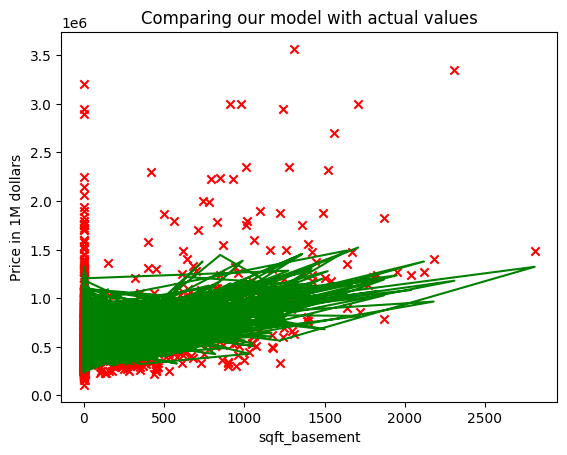

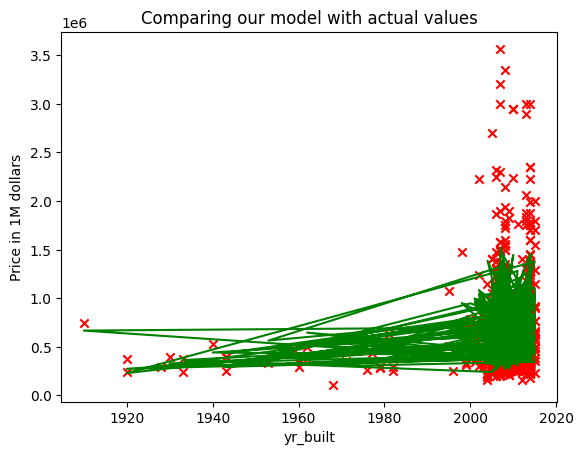

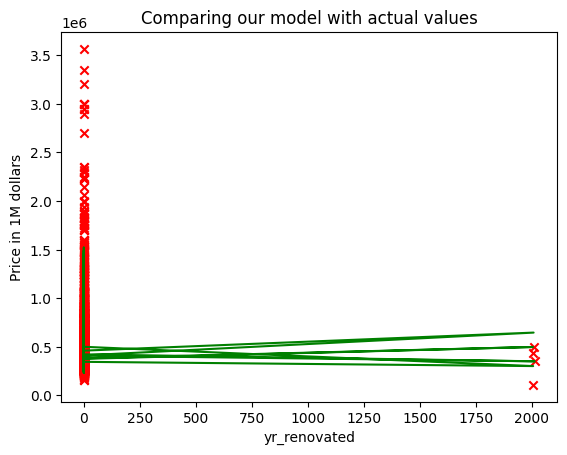

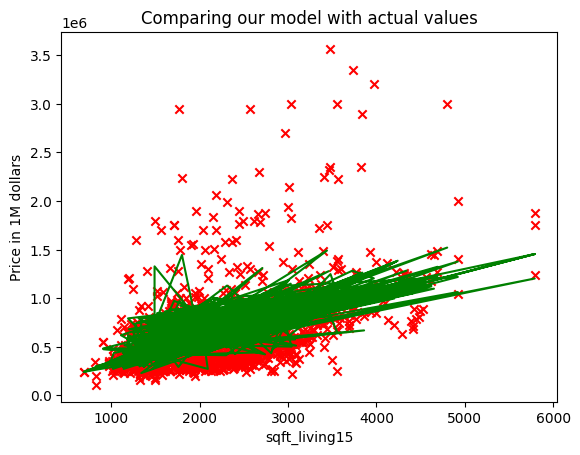

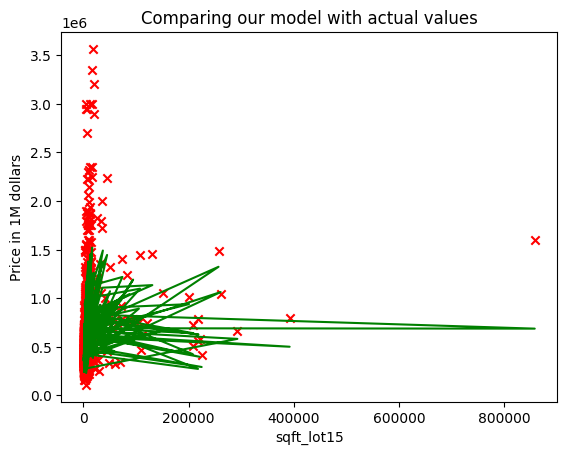

In [134]:
weight, bias = MultipleLinearRegression(x_train , y_train)

for i in range (x_train.shape[1]): #the number of plots should be equal to the number of features i.e. the number of columns in x_train
    # plt.figure(figsize=(6,6))
    plt.scatter(x_test[:,i], y_test, marker='x', c='r')
    plt.plot(x_test[:,i], PredictOutput(x_test, weight, bias), c='g')
    plt.xlabel(feature_labels[i + 1])
    plt.ylabel('Price in 1M dollars')
    plt.title('Comparing our model with actual values')
    plt.show()

Cost after update is  1966988037741222.0
Cost after update is  1.3022644312351754e+20